In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pickle
import time

import Dense
import mse
import ReLU
import Sigmoid
import Softmax
import LogLoss

In [2]:
with open('data_train.pickle', 'rb') as d:
    LOADED_DATA = pickle.load(d)

In [3]:
#data preparation

class One_Hot_Encoder:
    def __init__(self, dims):
        self.mat = -np.ones((dims, dims))
        for i in range(dims):
            self.mat[i][i]=1
        
    def __call__(self, data):
        return self.mat[int(data)]
    
    
def transform_from_pickle(data):
    encoder = One_Hot_Encoder(10)
    target_after_encoding = [encoder(int(i)) for i in data['target']]
    target = np.array(target_after_encoding)
    return data['data'], target

def train_test_split(data, target, validation_size=0.25, shuffle=True):
    assert len(data) == len(target)
    if shuffle:
        p = np.random.permutation(len(data))
        data = data[p]
        target = target[p]
    partition = int(len(data)*validation_size)
    return (data[:partition], data[partition:],
            target[:partition], target[partition:])

def standartize(data, epsilon=0.0001):
    return (data - np.mean(data, axis=0)) /(np.std(data, axis=0) + epsilon)

8.0

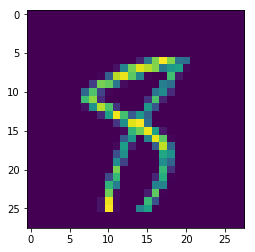

In [4]:
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28))
LOADED_DATA['target'][15]

In [15]:
class net3:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 10, 0.0000001)
        self.loss_ = mse.mse()
    
    def loss(self, x, y):
        return self.loss_.forward(x, y)
    
    def forward(self, x, label=None, prnt=False):
        x = self.d1.forward(x)
        if prnt:
            print(x)
        if label is None:
            return x
        return self.loss_.forward(x, label)
    
    def backward(self):
        loss = self.loss_.backward()
        loss = self.d1.backward(loss)

In [16]:
n = net3()
train_losses = []
valid_losses = []
DATA, TARGET = transform_from_pickle(LOADED_DATA)
DATA = standartize(DATA)

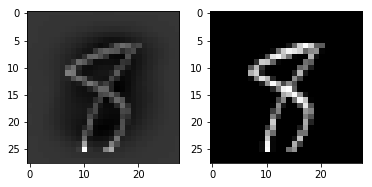

In [17]:
pyplot.subplot(1, 2, 1)
pyplot.imshow(DATA[15].reshape(28,28), cmap='gray')
pyplot.subplot(1, 2, 2)
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28), cmap='gray')

In [47]:
t1 = time.time()
epochs = 100
for epoch in range(epochs):
    t_start_epoch = time.time()
    train_data, valid_data, train_target, valid_target = train_test_split(DATA, TARGET)
    loss = 0
    for index, (data, target) in enumerate(zip(train_data, train_target)):
        t_start_thousand = time.time()
        loss += n.forward(data, target)
        n.backward()
    train_losses.append(loss)
    loss = 0
    for data, target in zip(valid_data, valid_target):
        loss += n.forward(data, target)
    valid_losses.append(loss)
    t_end_epoch = time.time()
    print('epoch #', epoch, 'time', t_end_epoch - t_start_epoch, 'loss =', loss)
t2 = time.time()
print(t2 - t1)

epoch # 0 time 3.4531972408294678 loss = 6161.831785161602
epoch # 1 time 3.0621752738952637 loss = 6188.981458452484
epoch # 2 time 2.978170394897461 loss = 6200.644514797852
epoch # 3 time 3.0491745471954346 loss = 6186.24479372581
epoch # 4 time 3.0371737480163574 loss = 6181.7489541977475
epoch # 5 time 3.012171983718872 loss = 6198.070654425216
epoch # 6 time 3.0501744747161865 loss = 6180.642543009096
epoch # 7 time 3.003171682357788 loss = 6221.60992289922
epoch # 8 time 3.0181727409362793 loss = 6191.849256292002
epoch # 9 time 2.981170654296875 loss = 6182.272980170648
epoch # 10 time 2.990170955657959 loss = 6198.565224622138
epoch # 11 time 3.0321731567382812 loss = 6183.479322995033
epoch # 12 time 3.0281729698181152 loss = 6172.093328711892
epoch # 13 time 3.0171725749969482 loss = 6182.643170827058
epoch # 14 time 3.001171350479126 loss = 6197.30968974366
epoch # 15 time 3.0151724815368652 loss = 6183.741330544377
epoch # 16 time 2.972169876098633 loss = 6199.715993003489

33744 0.8569904761904762


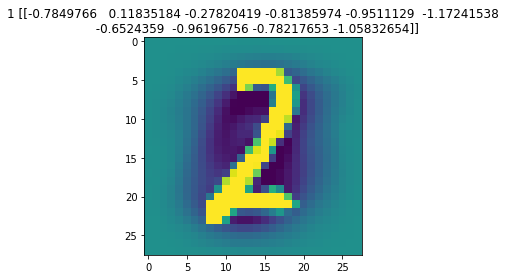

In [49]:
right_answers = 0
for data, target in zip(valid_data, valid_target):
        answer = n.forward(data)
        if np.argmax(answer) == np.argmax(target):
            right_answers += 1
        else:
            wrong_data = data
print(right_answers, right_answers/valid_target.shape[0])
pyplot.imshow(wrong_data.reshape(28, 28), vmin=-1, vmax=1)
pyplot.title(str(np.argmax(n.forward(wrong_data))) + ' ' + str(n.forward(wrong_data)))
n.d1.lr /= 1

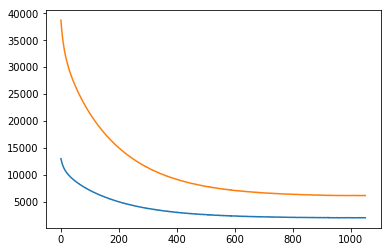

In [52]:
start = 0
pyplot.plot(train_losses[start:])
pyplot.plot(valid_losses[start:])

[[-0.87696036 -0.75018172  0.87205681 -1.18442081 -0.74888688 -1.2164426
  -1.01854004 -0.87720974 -0.81909797 -0.72240831]]
(1, 10)


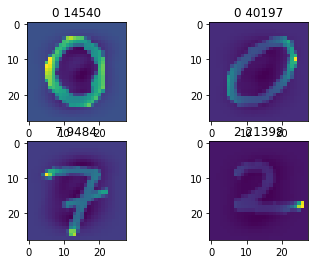

In [56]:
for i in range(4):
    number = np.random.randint(len(DATA))
    pyplot.subplot(2, 2, i+1)
    pyplot.imshow(DATA[number].reshape(28, 28))
    pyplot.title(str(np.argmax(n.forward(DATA[number]))) + ' ' + str(number))
print(n.forward(DATA[number]))
print(n.forward(DATA[number]).shape)
#for i in range(10):
#    pyplot.subplot(4, 5, i+11)
#    pyplot.imshow(np.transpose(n.d1.mt, (1, 0))[i].reshape(28, 28))

[[-1.10130142 -0.68465706 -0.58523293 -0.57902791 -0.7926166   0.3742489
  -1.10195605 -0.69279513 -1.26219594 -0.87126625]]
5


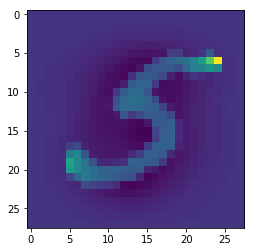

In [51]:
pyplot.imshow(DATA[number].reshape(28, 28))
answer = n.forward(DATA[number])
print(answer)
print(np.argmax(answer))


In [ ]:
np.array((1,2))*np.array((1,3))